# PROJECT PYTHON FOR DATA ANALYSIS
## Drug Consumptions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

### Dataset preparation

In [2]:
demographic_columns = ["Age","Gender","Education","Country","Ethnicity"]
personality_columns = ["Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS"]
feature_columns = demographic_columns + personality_columns
drugs_columns = ["Alcohol","Amphetamines","Amyl nitrite","Benzodiazepine","Caffeine","Cannabis","Chocolate","Cocaine","Crack","Ecstasy","Heroin","Ketamine","Legal highs","LSD","Methadone","Mushrooms","Nicotine","Fictitious drug Semeron","Volatile substance abuse"]
drugs_legal = ['Alcohol', 'Caffeine', 'Chocolate', 'Nicotine']
drugs_illegal = [drug for drug in drugs_columns if drug not in drugs_legal]
all_columns = feature_columns + drugs_columns

### Loading the dataset

In [4]:
df = pd.read_csv("drug_consumption.data",names=["ID"] + all_columns,header=None)
df = df.set_index("ID")
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Mushrooms,Nicotine,Fictitious drug Semeron,Volatile substance abuse
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


### Nominal drug to ordinal data

In [5]:
for i in drugs_columns:
    df[i] = df[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Mushrooms,Nicotine,Fictitious drug Semeron,Volatile substance abuse
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0


### Removing Semeron users

In [6]:
semerons = df[df['Fictitious drug Semeron'] != 0]
df = df[df['Fictitious drug Semeron'] == 0]
# Removing it from drug lists
drugs_columns.remove('Fictitious drug Semeron')
drugs_illegal.remove('Fictitious drug Semeron')
#Dropping the column from the dataset
df = df.drop(columns='Fictitious drug Semeron')
df.shape
df

## Machine Learning Models

### Binarization of the outputs

In [8]:
# Binarization for user/non-user
outputs = df[drugs_columns]
X = df.copy().drop(outputs, axis=1)
bin_outputs = [1 if sum(df[drugs_illegal].iloc[i] > 2) > 0 else 0 for i in range(len(df))]
bin_outputs

,Alcohol,Amphetamines,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Mushrooms,Nicotine,Volatile substance abuse
ID,,,,,,,,,,,,,,,,,,
1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1
1885,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,0
1886,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0


### Logistic Regression

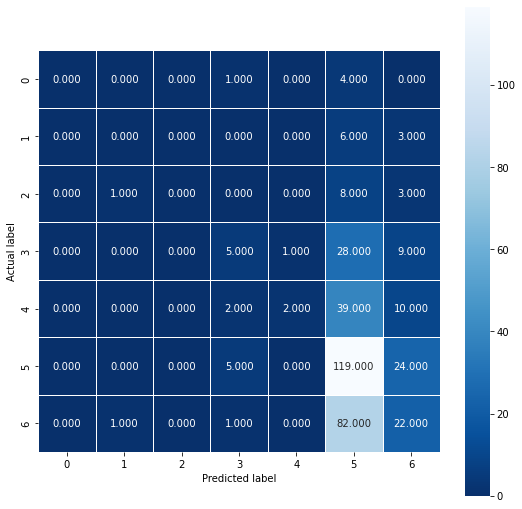

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn import metrics


outputs = df[drugs_columns]
X = df.copy().drop(outputs, axis=1)

# For 1 drug at a time. Need to manually change the value
X_train,X_test,y_train,y_test=train_test_split(X,outputs.Alcohol.values,test_size=0.2,random_state=9)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)



cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [10]:
score_cm = accuracy_score(y_test, y_pred)
score_cm

0.39361702127659576

### LDA

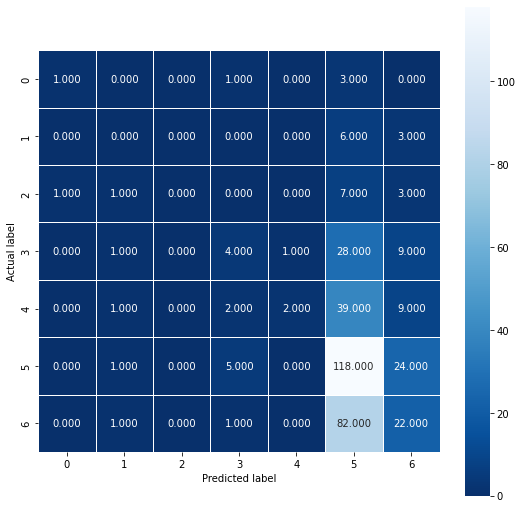

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

outputs = df[drugs_columns]
X = df.copy().drop(outputs, axis=1)

# For 1 drug at a time. Need to manually change the value
X_train,X_test,y_train,y_test=train_test_split(X,outputs.Alcohol.values,test_size=0.2,random_state=9)

clf = LDA()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [12]:
score_cm = accuracy_score(y_test, y_pred)
score_cm

0.39095744680851063

In [13]:
set(df.Alcohol.values)

{0, 1, 2, 3, 4, 5, 6}

### KNN
#### Adding a new variable: is the individual an illegal drug user or not?

In [14]:
illegal_drug_var = [1 if sum(df[drugs_illegal].iloc[i] != 0) > 3 else 0 for i in range(len(df))]
df['Illegal_user'] = illegal_drug_var

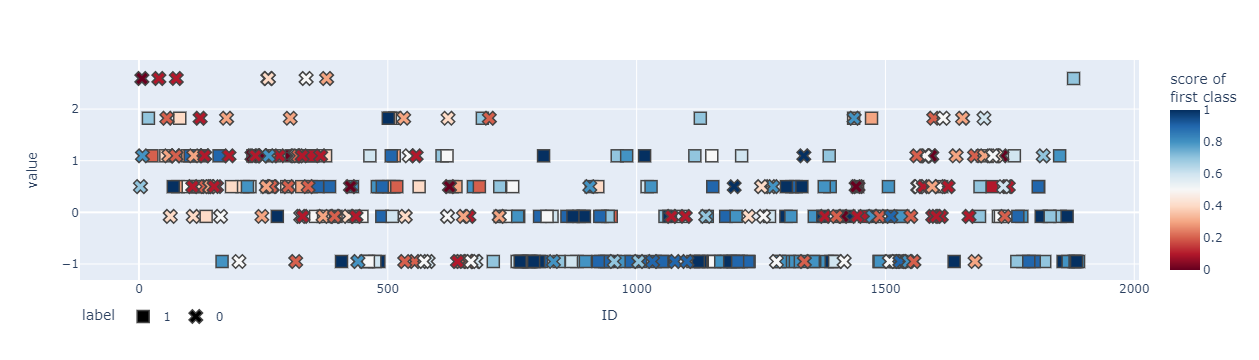

In [39]:
import plotly.express as px
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load and split data
outputs = df[drugs_columns]
X = df.copy().drop(outputs, axis=1)
X.drop(["Illegal_user"],axis=1, inplace=True)
# For 1 drug at a time. Need to manually change the value
X_train,X_test,y_train,y_test=train_test_split(X,df.Illegal_user,test_size=0.2,random_state=9)

# Fit the model on training data, predict on test data
clf = KNeighborsClassifier(10)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

fig = px.scatter(
    X_test.Age,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

#### PCA

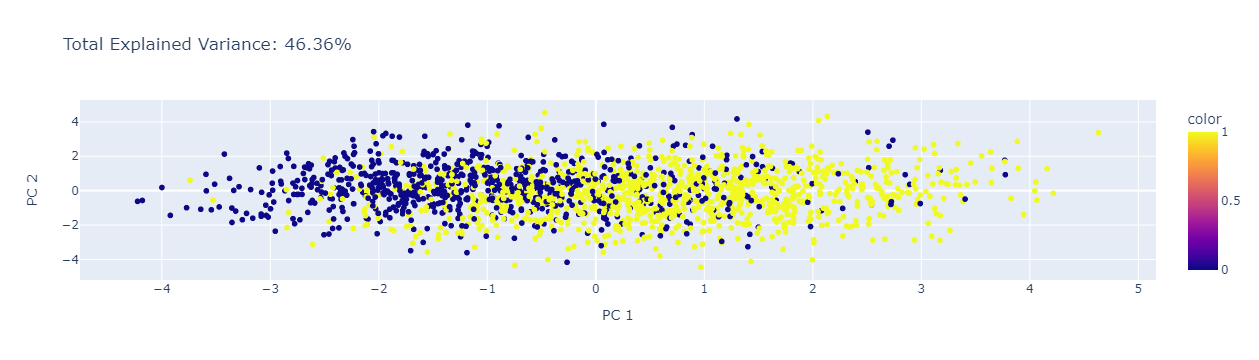

In [36]:
import plotly.express as px
from sklearn.decomposition import PCA

outputs = df[drugs_columns]
X = df.copy().drop(outputs, axis=1)
X.drop(["Illegal_user"],axis=1, inplace=True)

# Change the number of principal components
pca = PCA(n_components=2)
components = pca.fit_transform(X)
 
total_var = pca.explained_variance_ratio_.sum() * 100
# 2 components
fig = px.scatter(components, x=0, y=1, color=df.Illegal_user,title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'})

# 3 components
'''
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df.Illegal_user, 
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
'''
'''
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)
'''

fig.show()


In [30]:
contribs = pca.components_.T * np.sqrt(pca.explained_variance_)
contribs

array([[-0.41707507,  0.14554468],
       [-0.14825888,  0.02569055],
       [-0.33240353, -0.18334217],
       [-0.36635239,  0.06612081],
       [ 0.01976276, -0.00813256],
       [ 0.48252794,  0.55561131],
       [-0.15506808, -0.80554002],
       [ 0.41400446, -0.57843996],
       [-0.45759119, -0.25272731],
       [-0.65537801, -0.37790829],
       [ 0.68200668, -0.26202245],
       [ 0.69159184, -0.44853008]])

In [38]:
pca.components_

array([[-0.26636978, -0.09468723, -0.21229333, -0.23397516,  0.01262171,
         0.30817201, -0.09903601,  0.2644087 , -0.29224586, -0.41856469,
         0.43557139,  0.44169306],
       [ 0.10763067,  0.01899823, -0.13558201,  0.04889651, -0.00601405,
         0.410876  , -0.59569894, -0.42775785, -0.1868925 , -0.27946416,
        -0.19376628, -0.33168916]])

### Multilabel Classification

In [24]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np
X, y1 = make_classification(n_samples=10, n_features=100, n_informative=30, n_classes=3, random_state=1)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
Y = np.vstack((y1, y2, y3)).T
n_samples, n_features = X.shape # 10,100
n_outputs = Y.shape[1] # 3
n_classes = 3
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X, Y).predict(X)

array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])